### https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html

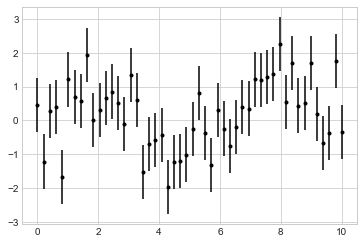

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k');

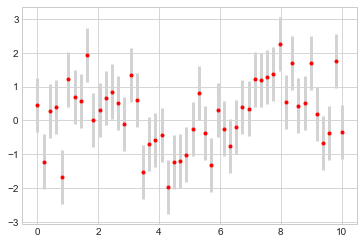

In [4]:
plt.errorbar(x, y, yerr=dy, fmt='.r',ecolor='lightgray',elinewidth=3);

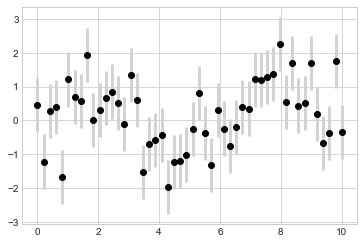

In [2]:
 plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
                    ecolor='lightgray', elinewidth=3, capsize=0);

### 给底图添加自定义legend

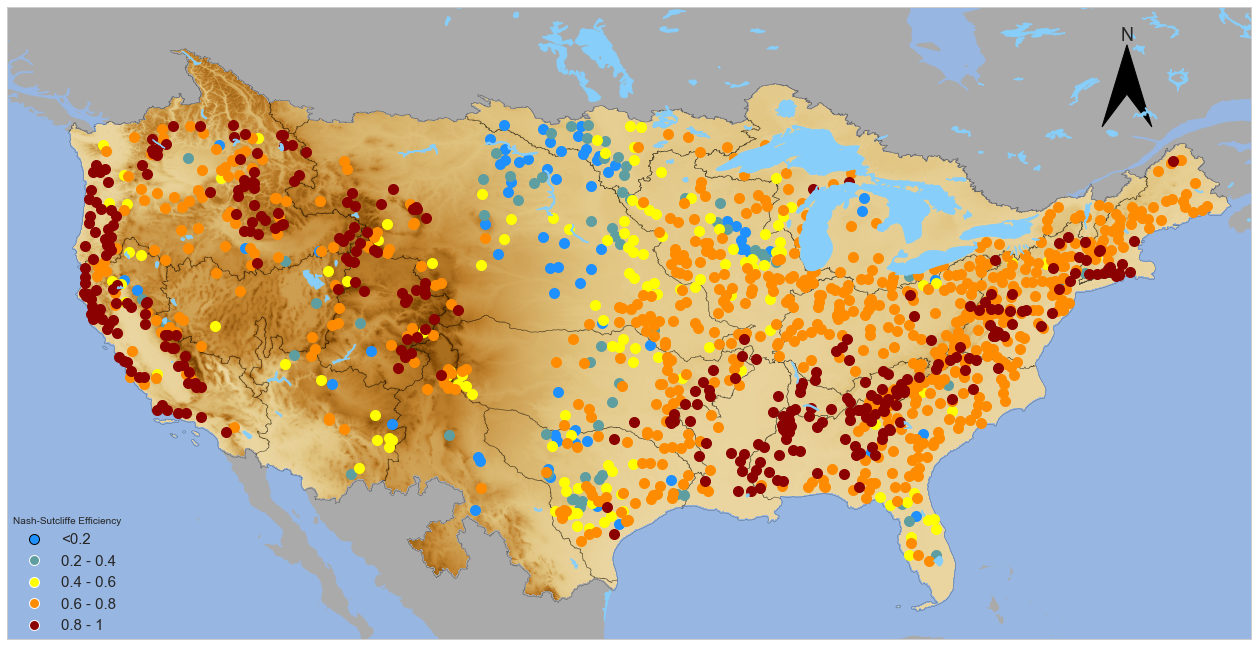

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import cartopy.feature as cfeature
import matplotlib.patches as mpatches
from cartopy.io.shapereader import Reader
import rioxarray as rxr
import pandas as pd
import geopandas as gpd
# from matplotlib.patches import Patch
from matplotlib.lines import Line2D
fig, ax = plt.subplots(figsize=(18, 12),subplot_kw={'projection': ccrs.PlateCarree()})
leftlon, rightlon, lowerlat, upperlat = (-128, -65, 23, 55)
dem_extent=(-124.908333333333,-66.0083333333334,24.3916666666667,52.8916666666667)
ax.set_extent([leftlon, rightlon, lowerlat, upperlat], ccrs.PlateCarree())
wbd_path=r'C:\Users\dingxj\Desktop\WBD\COUNS_18.shp'
dem_pre_arr = rxr.open_rasterio(r'C:\Users\dingxj\Downloads\ETOPO1_Bed_g_geotiff\COUNS.tif').rio.write_crs(
    ccrs.PlateCarree(), inplace=True)

dem = dem_pre_arr[0]
dem = dem.where(~(dem.values == -2147483648))
#imshow plot dem
viridisBig = cm.get_cmap('BrBG_r', 512)
newcmp = ListedColormap(viridisBig(np.linspace(0.65, 1, 256)))
cbar=ax.imshow(dem.values,
              # transform=ccrs.PlateCarree(),
              # #cmap=plt.cm.Reds
                cmap=newcmp,
                extent=dem_extent,
                vmin = 0, vmax = 4302,
                transform=ccrs.PlateCarree()
              )
#
# ax2=fig.add_axes([0.85,0.2,0.02,0.2])
# ax2.set_title('Elevation(m)',fontsize=10)
# fig.colorbar(cbar,cax=ax2,shrink=0.4,pad=-0.01)

# shapefile=Reader(wbd_path)
# ax.add_geometries(Reader(wbd_path).geometries(),
#                   ccrs.PlateCarree(),
#                   facecolor='none', #hatch='xxxx',
#                   linewidth = 0.5,
#                   alpha = 0.4,
#                   # k = 5,
#                     )
#添加shp
geodf = gpd.read_file(r'C:\Users\dingxj\Desktop\WBD\COUNS_18.shp').to_crs(ccrs.PlateCarree())
geodf.plot(ax=ax,
                    facecolor="none",

                    linewidth=0.5,
                    alpha=0.4,
                    k=5,
                    )
#添加指北针
def add_north(ax, labelsize=18, loc_x=0.90, loc_y=0.95, width=0.04, height=0.13, pad=0.14):
    """
    画一个比例尺带'N'文字注释
    主要参数如下
    :param ax: 要画的坐标区域 Axes实例 plt.gca()获取即可
    :param labelsize: 显示'N'文字的大小
    :param loc_x: 以文字下部为中心的占整个ax横向比例
    :param loc_y: 以文字下部为中心的占整个ax纵向比例
    :param width: 指南针占ax比例宽度
    :param height: 指南针占ax比例高度
    :param pad: 文字符号占ax比例间隙
    :return: None
    """
    minx, maxx = ax.get_xlim()
    miny, maxy = ax.get_ylim()
    ylen = maxy - miny
    xlen = maxx - minx
    left = [minx + xlen*(loc_x - width*.5), miny + ylen*(loc_y - pad)]
    right = [minx + xlen*(loc_x + width*.5), miny + ylen*(loc_y - pad)]
    top = [minx + xlen*loc_x, miny + ylen*(loc_y - pad + height)]
    center = [minx + xlen*loc_x, left[1] + (top[1] - left[1])*.4]
    triangle = mpatches.Polygon([left, top, right, center], color='k')
    ax.text(s='N',

            x=minx + xlen*loc_x,
            y=miny + ylen*(loc_y - pad + height),
            fontsize=labelsize,
            horizontalalignment='center',
            verticalalignment='bottom')
    ax.add_patch(triangle,)
#添加cartopy要素
ax.add_feature(cfeature.LAND.with_scale('50m'),facecolor='#AAAAAA')
ax.add_feature(cfeature.LAKES.with_scale('50m'),facecolor='lightskyblue')
# ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.OCEAN.with_scale('50m'))

#添加geoscater point
df=pd.read_csv(r'C:\E\GR2M_project\GR2M_OUTPUT\USGSGR2MFREEZE\GR2M_msnow\GR2M_msnow_nse.csv',index_col=0)
#extract nse<0.2
df1=df[df['validate_nse']<=0.2]
#extract 0.2<nse<0.4
df2=df[(0.2<df['validate_nse'])&(df['validate_nse']<=0.4)]
#extract 0.4<nse<0.6
df3=df[(0.4<df['validate_nse'])&(df['validate_nse']<=0.6)]
#extract 0.6<nse<0.8
df4=df[(0.6<df['validate_nse'])&(df['validate_nse']<=0.8)]
#extract 0.8<nse<1
df5=df[(0.8<df['validate_nse'])&(df['validate_nse']<=1)]
#plot scater
markersize=100
gdf1= gpd.GeoDataFrame(
    df1, geometry=gpd.points_from_xy(df1.long_dd, df1.lat_dd))
gdf1.plot(ax=ax, color='dodgerblue',legend=True,markersize=markersize)

gdf2= gpd.GeoDataFrame(
    df2, geometry=gpd.points_from_xy(df2.long_dd, df2.lat_dd))
gdf2.plot(ax=ax, color='cadetblue',legend=True,markersize=markersize)

gdf3= gpd.GeoDataFrame(
    df3, geometry=gpd.points_from_xy(df3.long_dd, df3.lat_dd))
gdf3.plot(ax=ax, color='yellow',legend=True,markersize=markersize)

gdf4= gpd.GeoDataFrame(
    df4, geometry=gpd.points_from_xy(df4.long_dd, df4.lat_dd))
gdf4.plot(ax=ax, color='darkorange',legend=True,markersize=markersize)

gdf5= gpd.GeoDataFrame(
    df5, geometry=gpd.points_from_xy(df5.long_dd, df5.lat_dd))
gdf5.plot(ax=ax, color='darkred',legend=True,markersize=markersize)

#绘制legend这里对应 from matplotlib.patches import Patch patch是方形
# legend_element = [Patch(facecolor='lightyellow',
#                         edgecolor='k',
#                         label='-1 - 0'),
#                   Patch(facecolor='lightgreen',
#                         edgecolor='k',
#                         label='0 - 0.2'),
#                   Patch(facecolor='paleturquoise',
#                         edgecolor='k',
#                         label='0.2 - 0.4'),
#                   Patch(facecolor='lightskyblue',
#                         edgecolor='k',
#                         label='0.4 - 0.6'),
#                   Patch(facecolor='royalblue',
#                         edgecolor='k',
#                         label='0.6 - 0.8'),
#                   Patch(facecolor='darkblue',
#                         edgecolor='k',
#                         label='0.8 - 1'#,
#                         # sketch_params(length:0.5)
#                         )]#set_sketch_params(length=0.5)
legend_element = [
                

                Line2D([0], [0], marker='o', color='none',linestyle='', label='<0.2',
                          markerfacecolor='dodgerblue', markersize=10),

                Line2D([0], [0], marker='o', linestyle='', color='w', label='0.2 - 0.4',
                          markerfacecolor='cadetblue', markersize=10),

                Line2D([0], [0], marker='o', linestyle='',color='w', label='0.4 - 0.6',
                          markerfacecolor='yellow', markersize=10),

                Line2D([0], [0], marker='o', linestyle='',color='w', label='0.6 - 0.8',
                          markerfacecolor='darkorange', markersize=10),

                Line2D([0], [0], marker='o', linestyle='',color='w',label='0.8 - 1',
                         markerfacecolor='darkred', markersize=10),
                ]#set_sketch_params(length=0.5)

leg =plt.legend(handles=legend_element,loc='lower left',
           # bbox_to_anchor=(1.05,1.0),
           borderaxespad=0.,
           fontsize=15,
           frameon=False,
           title='Nash-Sutcliffe Efficiency')
# leg = ax.legend(['<0.2','0.2-0.4', '0.4-0.6','0.6-0.8','0.8-0.1'], fancybox=True, framealpha=0.8, prop={'size': 10}, labelspacing=0.1,
#                      loc='lower left',title='Nash-Sutcliffe Efficiency')
leg.get_frame().set_edgecolor('white')
#调整图间距大小
#添加指北针
add_north(ax)
# ax.set_title('GR2M',fontdict={'fontsize':30}, loc='center')
plt.subplots_adjust(left=0.02, right=0.98, bottom=0.02, top=0.98, hspace=0.005, wspace=0.02)
plt.show()